In [26]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *
from utils import *
import pretrainedmodels

In [2]:
from torchvision.models import vgg16_bn
from PIL import Image, ImageDraw, ImageFont

### Available torchvision models:

In [3]:
[k for k,v in sys.modules['torchvision.models'].__dict__.items() if callable(v)]

['alexnet',
 'AlexNet',
 'ResNet',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'resnext50_32x4d',
 'resnext101_32x8d',
 'wide_resnet50_2',
 'wide_resnet101_2',
 'VGG',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19_bn',
 'vgg19',
 'SqueezeNet',
 'squeezenet1_0',
 'squeezenet1_1',
 'Inception3',
 'inception_v3',
 'InceptionOutputs',
 '_InceptionOutputs',
 'DenseNet',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'googlenet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 '_GoogLeNetOutputs',
 'MobileNetV2',
 'mobilenet_v2',
 'MNASNet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'ShuffleNetV2',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0']

### Available fastai models

In [4]:
[k for k,v in models.__dict__.items() if callable(v)]

['XResNet',
 'xresnet18',
 'xresnet34',
 'xresnet50',
 'xresnet101',
 'xresnet152',
 'xresnet18_deep',
 'xresnet34_deep',
 'xresnet50_deep',
 'ResNet',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'mobilenet_v2',
 'SqueezeNet',
 'squeezenet1_0',
 'squeezenet1_1',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'alexnet',
 'Darknet',
 'ResLayer',
 'DynamicUnet',
 'UnetBlock',
 'BasicBlock',
 'WideResNet',
 'wrn_22',
 'xception']

### Available pretrained models from cadene

In [31]:
[k for k,v in pretrainedmodels.__dict__.items() if callable(v)]

['fbresnet152',
 'cafferesnet101',
 'bninception',
 'resnext101_32x4d',
 'resnext101_64x4d',
 'inceptionv4',
 'inceptionresnetv2',
 'nasnetalarge',
 'nasnetamobile',
 'alexnet',
 'densenet121',
 'densenet169',
 'densenet201',
 'densenet161',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'inceptionv3',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19_bn',
 'vgg19',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn131',
 'dpn107',
 'xception',
 'senet154',
 'se_resnet50',
 'se_resnet101',
 'se_resnet152',
 'se_resnext50_32x4d',
 'se_resnext101_32x4d',
 'pnasnet5large',
 'polynet']

In [5]:
def crappify(fn,i):
    dest = path_lr/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, 96, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    w,h = img.size
    q = random.randint(10,70)
    ImageDraw.Draw(img).text((random.randint(0,w//2),random.randint(0,h//2)), str(q), fill=(255,255,255))
    img.save(dest, quality=q)

# This section is for random learning experiments.

In [6]:
FakeData()

In [5]:
learn = cnn_learner(FakeData(), models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/aldriankwan/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [12]:
learn.model,arch_summary(models.alexnet)

(0) Sequential  : 13  layers (total: 13)
(1) AdaptiveAvgPool2d: 1   layers (total: 14)
(2) Sequential  : 7   layers (total: 21)


(Sequential(
   (0): Sequential(
     (0): Sequential(
       (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
       (1): ReLU(inplace=True)
       (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
       (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
       (4): ReLU(inplace=True)
       (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
       (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       (7): ReLU(inplace=True)
       (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       (9): ReLU(inplace=True)
       (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       (11): ReLU(inplace=True)
       (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
     )
     (1): AdaptiveAvgPool2d(output_size=(6, 6))
   )
   (1): Sequential(
     (0): AdaptiveConcatPool2d(
       (ap): Ada

In [14]:
get_groups(nn.Sequential(*learn.model[0], *learn.model[1]), learn.layer_groups)

In [15]:
[i for i in models.alexnet(False).children()]
# _alexnet_meta     = {'cut':-1, 'split':_alexnet_split}
# def _alexnet_split(m:nn.Module): return (m[0][0][6],m[1])


[Sequential(
   (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (4): ReLU(inplace=True)
   (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (7): ReLU(inplace=True)
   (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (9): ReLU(inplace=True)
   (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
 ),
 AdaptiveAvgPool2d(output_size=(6, 6)),
 Sequential(
   (0): Dropout(p=0.5, inplace=False)
   (1): Linear(in_features=9216, out_features=4096, bias=True)
   (2): ReLU(inplace=True)
   (3): Dropout(p=0.5, inplace=False)

# Model experiments and working towards creating the U-net with resnext model

We are using resnext architecture, specifically resnext50_32x4d from pytorch model. For pretrained models that are not available on pytorch, we are going to import pretrainedmodels from [Here](https://github.com/Cadene/pretrained-models.pytorch). The goal of this section is to produce a working U-net model with Resnext_50 encoder.

In [5]:
import fastai
from fastai.vision import *
from fastai.vision.learner import model_meta
from fastai.callbacks import *
from fastai.utils.mem import *
import pretrainedmodels
from torchvision.models import *
from utils import *

In this section, we will use oxford pet dataset (yes, not the best, but will do for now)

In [2]:
path = untar_data(URLs.PETS)
path_hr = path/'images'
path_llr = path/'small-32'
path_lr = path/'small-96'
path_mr = path/'small-256'
path_hr

PosixPath('/home/aldriankwan/.fastai/data/oxford-iiit-pet/images')

In [3]:
il = ImageList.from_folder(path_hr)

In [4]:
def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=60)

In [5]:
# create smaller image sets the first time this nb is run
sets = [(path_llr,32),(path_lr, 96), (path_mr, 256)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)

resizing to 32 into /home/aldriankwan/.fastai/data/oxford-iiit-pet/small-32


In [6]:
# resnext50_32x4d(True)
# to download the model, use these syntax

We will use wrap the torchvision resnext50_34x4d model so it can work.<br>
<b>NOTE:</b> be careful when defining models and functions. Remember to only define the function below if models come from pretrainedmodels library instead of pytorch

In [7]:
# def resnext50_32x4d(pretrained=False):
#     pretrained = 'imagenet' if pretrained else None
#     model = resnext50_32x4d(pretrained=pretrained)
#     all_layers = list(model.children())
#     return nn.Sequential(*all_layers[0], *all_layers[1:])

In the block above, I mistook resnext50 for resnext100. resnext50 does exist in pytorch, while resnext100 does not. The code above assumes that the model that will be used comes from pretrainedmodels library

First, we will add meta for the resnext50_34x4d, as it does not exist in fastai library

In [6]:
_resnext_meta = {'cut': -2, 'split': lambda m: (m[0][6], m[1]) }
model_meta[resnext50_32x4d]=_resnext_meta

In [7]:
# arch_summary(alexnet)
alexnet,resnet34

(<function torchvision.models.alexnet.alexnet(pretrained=False, progress=True, **kwargs)>,
 <function torchvision.models.resnet.resnet34(pretrained=False, progress=True, **kwargs)>)

In [10]:
[i for i in resnext50_32x4d(False).children()]

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
     (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, ep

In [8]:
bs,size=2,32
arch = resnext50_32x4d
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)
arch,models.resnet34

(<function torchvision.models.resnet.resnext50_32x4d(pretrained=False, progress=True, **kwargs)>,
 <function torchvision.models.resnet.resnet34(pretrained=False, progress=True, **kwargs)>)

In [9]:
src.train,src.valid,src.test

(ImageImageList (6651 items)
 Image (3, 96, 144),Image (3, 128, 96),Image (3, 96, 128),Image (3, 96, 128),Image (3, 128, 96)
 Path: /home/aldriankwan/.fastai/data/oxford-iiit-pet/small-96,
 ImageImageList (739 items)
 Image (3, 96, 143),Image (3, 96, 141),Image (3, 128, 96),Image (3, 127, 96),Image (3, 96, 141)
 Path: /home/aldriankwan/.fastai/data/oxford-iiit-pet/small-96,
 None)

In [10]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [11]:
data = get_data(bs,size)

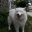

In [12]:
data.valid_ds[1][1]

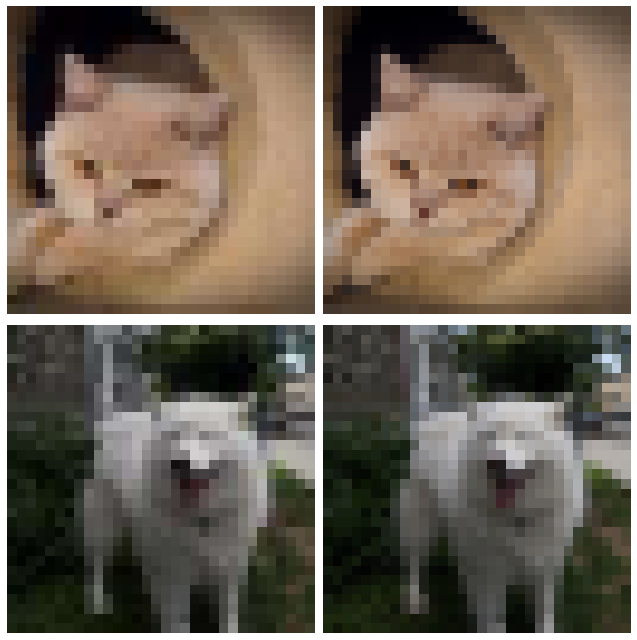

In [13]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

### Feature Loss

In [14]:
t = data.valid_ds[0][1].data
print(t[0])
t = torch.stack([t,t])

tensor([[0.2283, 0.2040, 0.1610,  ..., 0.3323, 0.3304, 0.3254],
        [0.2325, 0.2047, 0.1442,  ..., 0.3731, 0.3604, 0.3309],
        [0.2343, 0.1803, 0.1085,  ..., 0.4208, 0.3945, 0.3761],
        ...,
        [0.3662, 0.2239, 0.1777,  ..., 0.4437, 0.4208, 0.3982],
        [0.1873, 0.2152, 0.2499,  ..., 0.4026, 0.3784, 0.3714],
        [0.2651, 0.2703, 0.2924,  ..., 0.3731, 0.3490, 0.3462]])


In [15]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [16]:
gram_matrix(t)

tensor([[[0.1083, 0.0875, 0.0704],
         [0.0875, 0.0709, 0.0571],
         [0.0704, 0.0571, 0.0463]],

        [[0.1083, 0.0875, 0.0704],
         [0.0875, 0.0709, 0.0571],
         [0.0704, 0.0571, 0.0463]]])

In [17]:
base_loss = F.l1_loss

In [18]:
vgg_m = vgg16_bn(True).features.cuda().eval()
requires_grad(vgg_m, False)

In [19]:
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 22, 32, 42],
 [ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True)])

In [20]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [21]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,2])

In [3]:
def pretty_size(size):
    """Pretty prints a torch.Size object"""
    assert(isinstance(size, torch.Size))
    return " × ".join(map(str, size))

def dump_tensors(gpu_only=True):
    """Prints a list of the Tensors being tracked by the garbage collector."""
    import gc
    total_size = 0
    for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj):
                total_size += obj.numel()
            elif hasattr(obj, "data") and torch.is_tensor(obj.data):
                if not gpu_only or obj.is_cuda:
                    total_size += obj.data.numel()
        except Exception as e:
            pass        
    print("Total size:", total_size)

In [6]:
dump_tensors()
torch.cuda.empty_cache() 
if 'resnext_learn' in locals():resnext_learn.destroy()
gc.collect()

Total size: 123875920


/home/aldriankwan/Desktop/python-fastai/.venv/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:102: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


18

## Train

In [24]:
wd = 1e-3
resnext_learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     blur=True, norm_type=NormType.Weight).to_fp16()
gc.collect();

In [25]:
# resnext_learn.lr_find()
# resnext_learn.recorder.plot()
# This block will produce OOM in local machine - 2060 super 8GB

In [26]:
lr = 1e-3
slice(lr*10)

slice(None, 0.01, None)

In [27]:
def do_fit(learn,save_name, lrs=slice(lr), pct_start=0.9):
    learn.fit_one_cycle(10, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=1, imgsize=5)

In [28]:
do_fit(resnext_learn,'1a',slice(lr*10))

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time


RuntimeError: CUDA out of memory. Tried to allocate 82.00 MiB (GPU 0; 7.79 GiB total capacity; 6.43 GiB already allocated; 47.69 MiB free; 6.69 GiB reserved in total by PyTorch)